'''
sound data에 대해 알아보자
sinusoidal - 사인함수처럼 그려지는 것
phasor - sinusoidal을 만들어냄.

0도에서 360도가          <-degree
0~ 2파이에 대응됨        <-radian

파이=180도

sin() 괄호안에는  라디안 값이 들어가야 함!!!! 중요!!!

f(theta) = e^theta*i  = a+bi
e는 자연상수, i는 허수(-1에 루트씌운것)
즉, theta가 변하면 아웃값도 변함

theta = 0, 파이/2, 파이, 파이*3/2, 파이*2
f(파이/2) = 코사인=0, 사인은 1
f(파이)   = 코사인은 -1, 사인은 0

f(theta) = a+bi라고 할 때 theta값을 0, 파이/2, 파이, 파이*3/2,
복소평면 (cimplex plain)에 표시하면 
a값을 x축, b값을 y축에 집어넣고 찍으면 동그랗게 그려짐 (1,0),(0,-1),(-1,0),(0,1)에 찍힘
즉, 벡터값으로 모두 표현됨
오일러 공식 참고
'''

sin wave에는 시간개념이 없음. 소리는 그안에 시간의 개념이 있어야 함.

In [8]:
#phasor

from matplotlib import pyplot as plt     #    = import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np                     #numpy libarary를 import한 것
%matplotlib notebook
from scipy.signal import lfilter

In [173]:
# parameter setting
amp = 2         # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz   음질의 해상도를 의미. 1초를 10000개로 나눔
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz 100hz 남자목소리 같은

'''
t = 0.0001 0.0002 0.0003~ 이런식이면 10000개 들어감
0.5000 만드는 것이 목표
'''

In [174]:
#따라서
t = np.arange(1,sr*dur+1)/sr
t #만분의 일초부터 만분의 오천초까지 만듦.

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [175]:
#1*1/10^4

In [176]:
# generate phase
theta = t * 2*np.pi * freq
    #시간*2파이*프리퀀시  => 초당 몇바퀴를도는지 frequncy를 곱해줌

In [177]:
# generate signal by cosine-phasor
s= amp*np.sin(theta)
s

array([ 1.25581039e-01,  2.50666467e-01,  3.74762629e-01, ...,
       -2.50666467e-01, -1.25581039e-01,  3.92877345e-15])

<IPython.core.display.Javascript object>


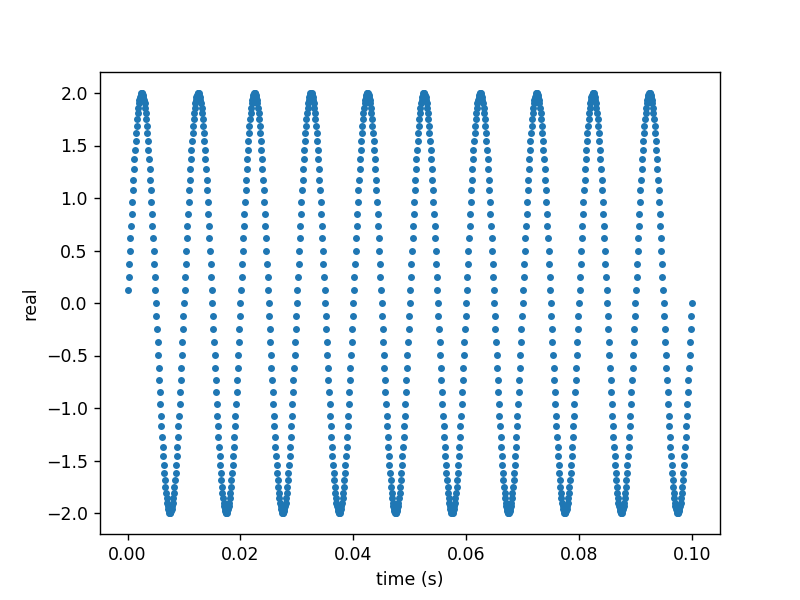

Text(0, 0.5, 'real')

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [179]:
#11월 7일

In [180]:
#각도만들기
theta = np.arange(0,2*np.pi,0.1)   #0부터 2파이까지의 각도를 만듦.  파이값이 증가하면 그래프가 그려지는 횟수도 증가. 2파이당 한바퀴

In [181]:
theta       #0부터 약 6.28까지 1씩 증가히므로

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [182]:
s = np.sin(theta)          #numpy에 들어있는 사임함수를 사용한 것. 사인함수에는 라디안 값을 0부터 6까지 총 7개 넣어주었음.
s                       #theta값의 변화에 따른 사인함수 결과값

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

<IPython.core.display.Javascript object>


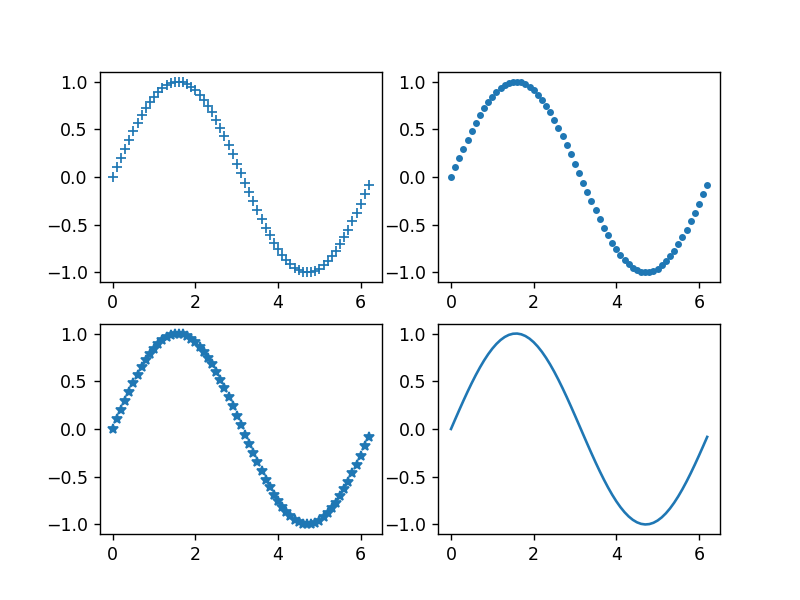

In [183]:
#plot하기
fig = plt.figure()
ax = fig.add_subplot(221)   #2*2로 화면 분리 후 첫 번째
ax.plot(theta, s, '+')      # +로 점찍기
ax = fig.add_subplot(222)   #2*2로 화면 분리 후 두 번째
ax.plot(theta, s, '.')       #.으로 점찍기
ax = fig.add_subplot(223)   #2*2로 화면 분리 후 세 번째
ax.plot(theta, s, '*')       #*로 점찍기
ax = fig.add_subplot(224)   #2*2로 화면 분리 후 네 번째
ax.plot(theta, s, '-')       #라인으로 연결하기


#축 0,1,2,3,4,5,6까지 값이 찍혀있음


<IPython.core.display.Javascript object>


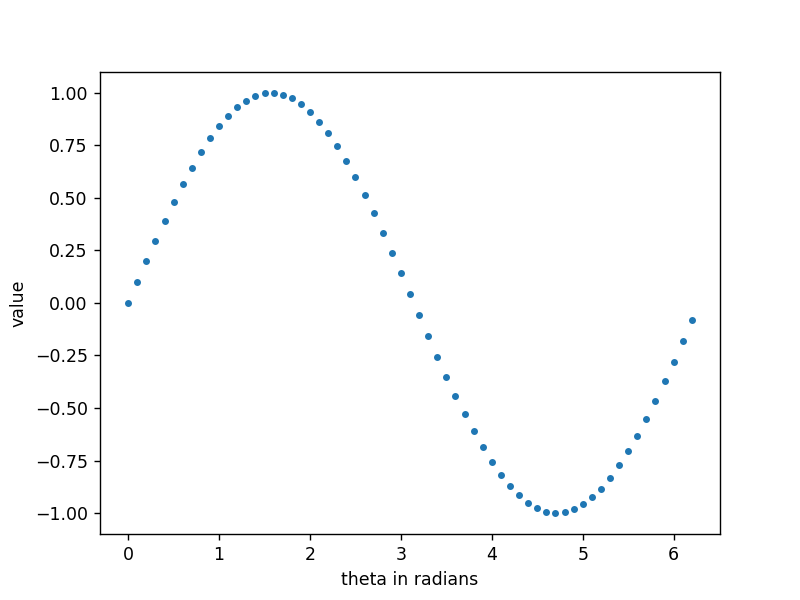

Text(0, 0.5, 'value')

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(theta, s,'.')           #디폴트값은 라인임 '-'
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

In [185]:
#x축의 증가량과 y축의 증가량이 비례하다면 linear함. 즉, 그래프가 직선으로 그려잠 (y=ax+b 형태의 그래프)
#나머지는 모두 non linear

In [186]:
#시간만들기
amp = 2         # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz   음질의 해상도를 의미. 1초를 10000개로 나눔
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz 100hz 남자목소리 같은

In [187]:
#시간만들기
t= np.arange(1,sr*dur+1)/sr 
               #1초를 샘플링레이트*소리길이, +1을 한 이유는 마지막꺼가 제외되기 때문.

In [188]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [189]:
#시간과 theta 합치기
#theta = t*2*np.pi   <-1초동안 한바퀴 돌기
theta = t * 2*np.pi * freq     #       <-frquency까지 더해주기 (?)

In [190]:
theta

array([6.28318531e-02, 1.25663706e-01, 1.88495559e-01, ...,
       3.14033602e+02, 3.14096434e+02, 3.14159265e+02])

In [191]:
s= np.sin(theta)

<IPython.core.display.Javascript object>


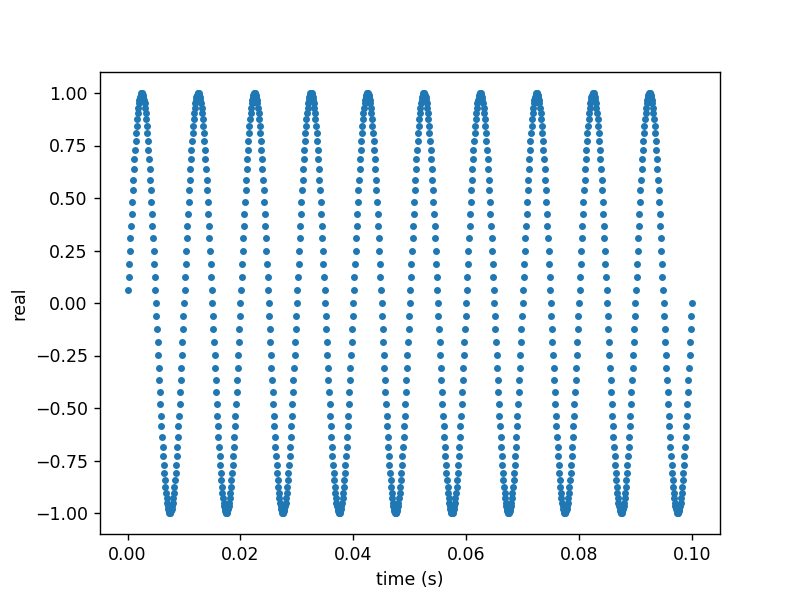

Text(0, 0.5, 'real')

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')          #t는 시간, s는 각도
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [193]:
c = np.exp(theta*1j)   #theta값만 변함 , j = i = 마이너스 루트1
c

#                           e-01 은 10분의 1, e-02는 100분의 1
#즉, 모든 숫자는 a+bi의 형태임

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

In [194]:
len(c)

5000

<IPython.core.display.Javascript object>


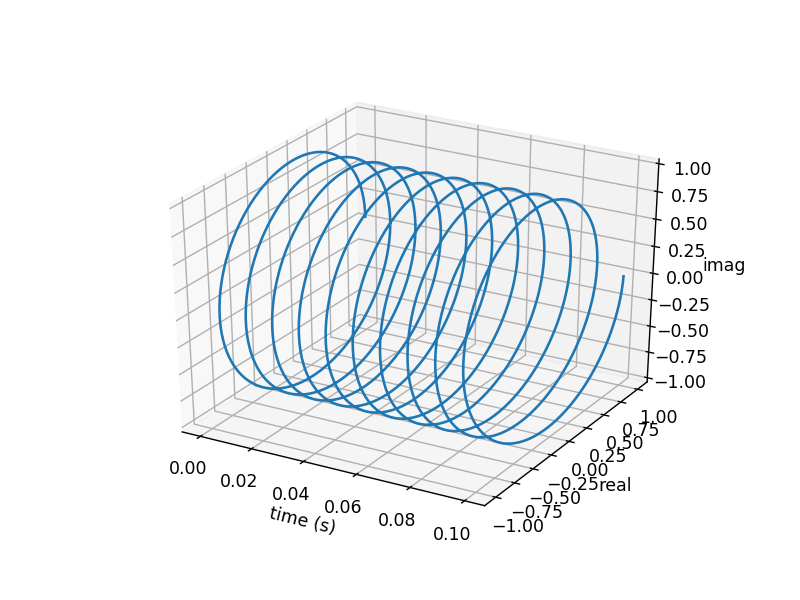

Text(0.5, 0, 'imag')

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '-')   #3차원이니까 3개의 입력 한 점당 3요소를 가짐(a,b,c)
#       시간,     c(=a+bi)값의 a부분,    c값의 b부분 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [196]:
#코사인은 real, 사인은 imaginary와 관련되어있음

In [197]:
#위에서 봤을 때 imag축 무시하고 보면 코사인그래프가 그려짐. (1,0)에서 시작
#옆에서 봤을 때 real축 무시하고 보면 사인그래프가 그려짐 (0,0)에서 시작

In [198]:
ipd.Audio(c.real,rate=sr)   #오디오 실행하는 라이브러리 (IPython.display의 약칭)
#         complex의 real값의 벡터값들
#         smping rate 넣은것.

In [199]:
#11월 12일

In [200]:
#!pip install sounddevice
import sounddevice as sd
sd.play(c.real, sr)              #소리 나옴. 위의ipd.Audio(c.real, rate=sr)과 유사한 코드

In [201]:
#parameter setting에서
#sampling rate는 1초동안 그 점들이 얼마나 많이 나오는가
#frequency는 웨이브가 몇번 반복이 되는가
#둘다 Hz단위지만 완전히 다른 것임.

In [202]:
#그렇다면 amplitude는 언제 사용하는지

In [206]:
'''amplitude는 진폭을 의미. 3차원 스프링이 어떻게 하면 커지는지'''
theta = t * 2*np.pi*freq
s= amp*np.sin(theta)       #<-amplitude는 1로 설정해놨으니까 -1~1 사이 진폭으로 그려질 거임


In [207]:
#만약 amp=2로 바꾸면 -2 ~2 진폭으로 그려질 것임. 진폭은 사이즈가 2임. 4아님.

<IPython.core.display.Javascript object>


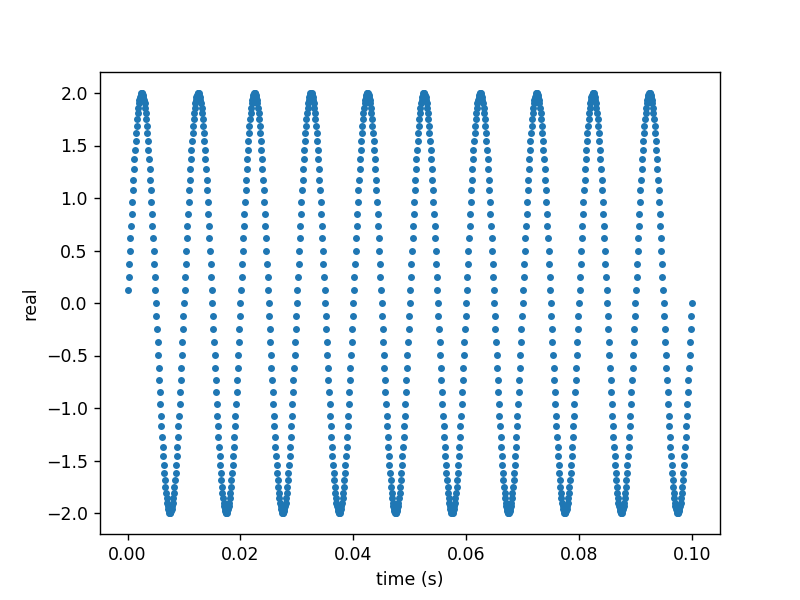

Text(0, 0.5, 'real')

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [212]:
#generate signal by complex-phasor
c=amp * np.exp(theta*1j)
c

array([1.99605346+1.25581039e-01j, 1.9842294 +2.50666467e-01j,
       1.9645745 +3.74762629e-01j, ..., 1.9842294 -2.50666467e-01j,
       1.99605346-1.25581039e-01j, 2.        +3.92877345e-15j])

<IPython.core.display.Javascript object>


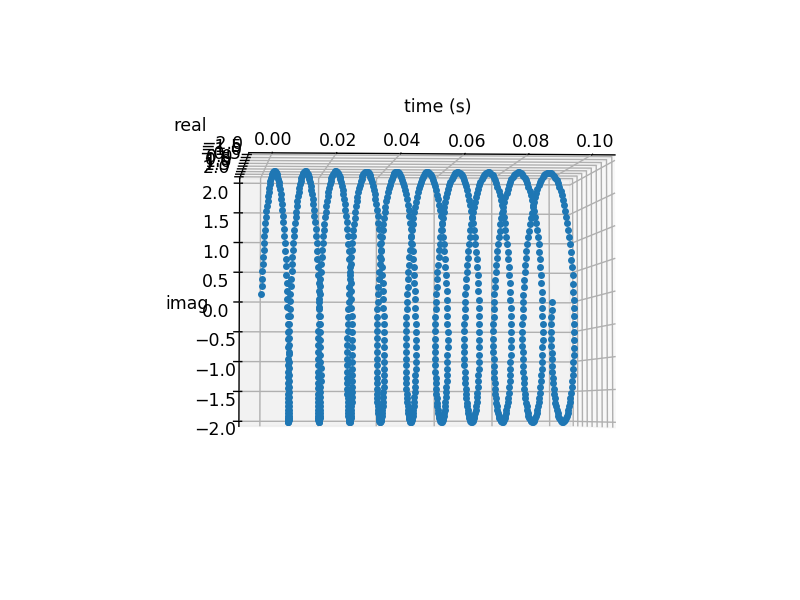

Text(0.5, 0, 'imag')

In [214]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')   #3차원이니까 3개의 입력 한 점당 3요소를 가짐(a,b,c)
#       시간,     c(=a+bi)값의 a부분,    c값의 b부분 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#amp가 2니까 진폭이 -2~2임. 원통의 지름이 모두 4인거임 쉽게말해서. 결국 amplitude가 반지름이 되는거임

In [216]:
ipd.Audio(c.real,rate=sr)    #즉, 진폭이 커졌으니까 소리도 더 커짐.

Generate pulse Train

In [ ]:
#최소의 harmonics를 설정하고 예를들어 100hz, 그다음에 배수의 하모닉스를 만들면됨.
#즉, 우선 F0를 만들고 배음 만들어서 더하면 됨.

In [ ]:
'''
중요!!
sampling rate이 100hz라면
우리가 1초를 100개로 쪼개는 것. 이 100개의 숫자를 가지고 1hz를 표현할 수 있다!!!
즉, 한 번의 사인웨이브 주기가 있으면 되는 것임. 
그렇다면 2hz는? 두번 왔다갔다하면됨.
그렇다면 10000hz? 1초동안 10000번을 왔다갔다할 수 있을까? 주어진 숫자는 100개니까 불가능함.
즉, sampling rate가 충분해야 그만큼의 주파수를 표현할 수 있음.
태블릿참고!!
즉,표현할 수 있는 주파수는 샘플링 레이트의 반을 넘지 못함
cd음질은 44100hz. 그럼 nyquist frequency는 22050hz.
즉 22050이면 아주 높은 소리까지 표현 가능.
왜cd음질이 44100일까? 사람이 들을 수 있는 가청주파수가 20000hz이기 때문에.
그위로는 어차피 사람이 못듣기 때문. 
꼬불꼬불한 선 달린 유선전화의 sr은 8000hz. ->4000hz까지 표현 가능
그래서 목소리 구별이 어려운 것.
웬만한 F1,F2,F3,F4는 대부분 4000안에서 그려짐. -> 말은 4000hz안이면 알아들을 수 있음
목소리는 그 이상의 hz에 따라 분류되기도하므로 유선전화로 목소리 구분 어려움
핸드폰은 16000hz 정도이므로 목소리 구별이 쉬움.
즉, 샘플링레이트의 반이 표현할 수 있는 최고의 frequency.
cd음질로는 박쥐의 고주파를 담을 수 없음.
예를들어 박쥐가10만의주파수면, cd는 2만정도의 주파수 밖에 못담기 때문.
즉,초음파(사람이 분간할 수 있는 20000hz를 넘어가는)는 frequency에 해당되는 이야기.
초음파 기계도 소리가 남! 다만 못들을 뿐. 
'''

<IPython.core.display.Javascript object>


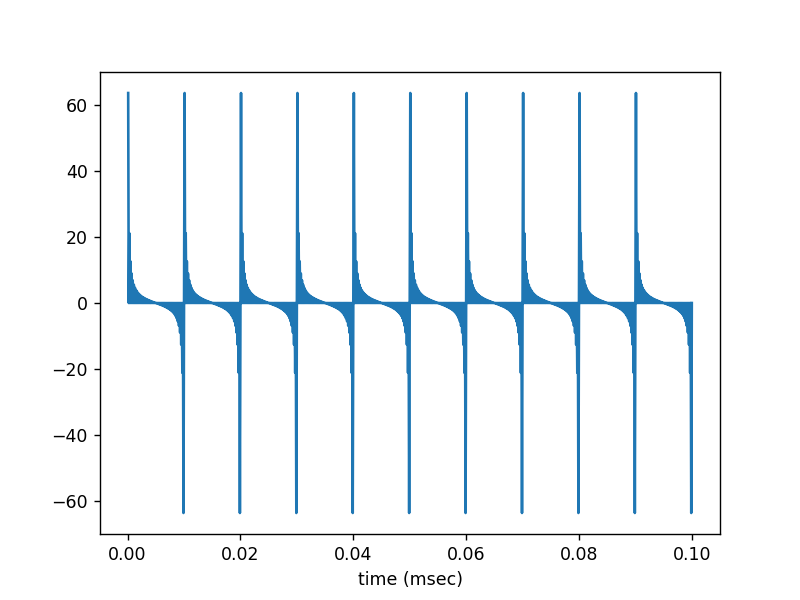

In [224]:
# generate samples, note conversion to float32 array
F0 = 100               #100부터 시작해서 끝은? sampling rate의 반임.
Fend = int(sr/2)       #끝은 sr의 반. 즉, nyquist frequency. 그냥 지저분할까봐 정수처리함.
s = np.zeros(len(t))    #최초의 s값은 비어있으므로, 정의해준 것임. 시간의 벡터 갯수만큼 0을 만들어준 것임. 아래 반복문에서 계속 더해짐.

#시간은 이미 만들었다고 가정. 시간을 만들고 그다음에 theta값 만들고, 사인에 입력했음.
for freq in range(F0, Fend+1, F0):   #F0부터 Fend까지 100(F0)만큼씩 증가. Fend포함해야되니까 +1. 100~5000까지니까 50번의 루프가 돌게됨
    theta = t * 2*np.pi * freq   #시간 곱하기 2파이 곱하기 주파수. 즉, 사인에 입력할 theta만들고
    tmp = amp * np.sin(theta)    #사인에 입력. 진폭 곱해주고.
    s = s + tmp                  #반복해서 계속 더해주는 것.
    
#다그려진 s를 1000번까지만 그림. 5000중에 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

#이그림은 스펙트럼이 아님. 
#스펙트럼은 일정시간에서의 hz들의 모임이니까.

In [ ]:
#sampling rate를 높이면 두꺼운 부분이 완전히 얇아지며 그냥 선 하나처럼 보일거임.

#11월 14일
'''
사람의 목소리와 비슷하게 만들어가기
frequency가 증가할 수록 hz가 decrease하게 만들고
그위에 f1 f2 f3 f4 만들어보기
'''

In [22]:
#라이브러리 import
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [23]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz

<IPython.core.display.Javascript object>


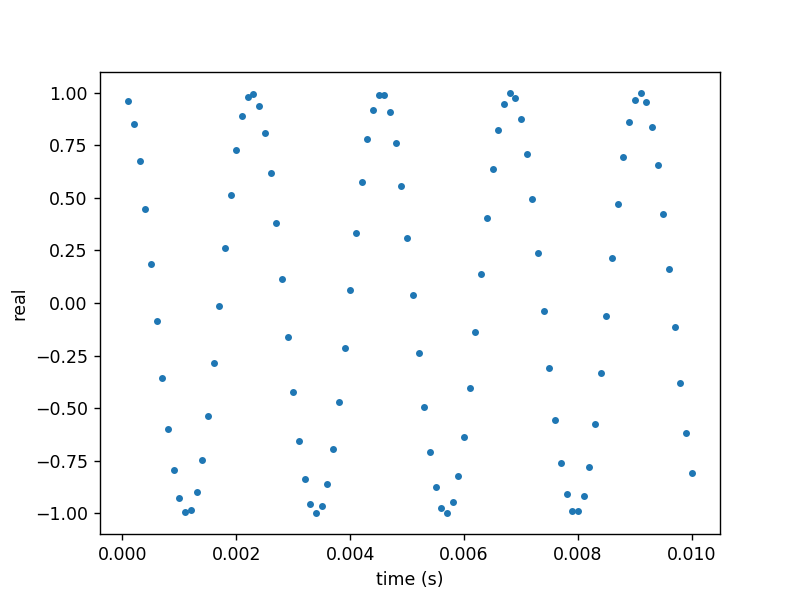

Text(0, 0.5, 'real')

In [24]:
# generate time

t = np.arange(1, sr * dur+1)/sr

# generate phase

theta = t * 2*np.pi * freq

# generate signal by cosine-phasor

s = amp*np.cos(theta)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [25]:
ipd.Audio(s, rate=sr)              #freq: 440, 880, 1760 모두 A음. 즉, 라음. 한 옥타브씩 올라감. 배수마다

In [26]:
#sin의 라음이나 cos의 라음 모두 똑같이 들림.
#그렇다면 둘의 차이는? 모양도 같다. 다만 시작점이 다름. 90도만큼 즉, 파이/2만큼
#그래프의 이동폭은 소리에 차이가 없음.
#이동폭은 결국 각도이고 이 phase는 청각과 관련없음.
#phase이동은 frequency와 관련 없음.


In [27]:
#complex값
c= amp*np.exp(theta*1j)
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

<IPython.core.display.Javascript object>


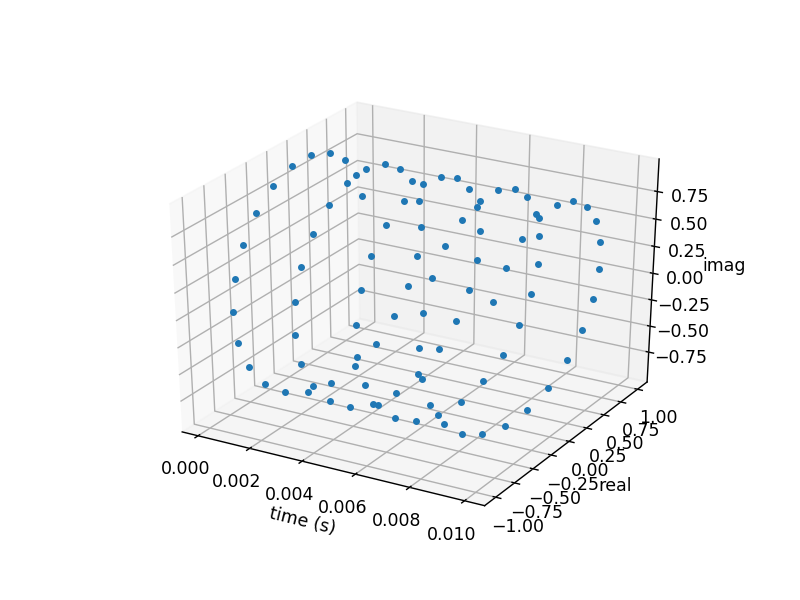

Text(0.5, 0, 'imag')

In [28]:
#complex값의 실수 부분만 plot하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [30]:
ipd.Audio(s, rate=sr)

In [41]:
def hz2w(F, sr):      #만들어져있는 함수.
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [42]:
#스펙트로그램에서
RG = 0  # RG is the frequency of the Glottal Resonator(산맥이 만들어질 위치)
BWG = 100  # BWG is the bandwidth of the Glottal Resonator(산맥을 만들때 산의 폭)
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

#frequency 0에다가 산맥을 만드니까, frequency0 부터 frequency가 증가할 수록 계속 decrease함

In [43]:
RG = 500  # RG is the frequency of the Glottal Resonator(산맥이 만들어질 위치)
BWG = 60  # BWG is the bandwidth of the Glottal Resonator(산맥을 만들때 산의 폭)
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [44]:
RG = 1500  # RG is the frequency of the Glottal Resonator(산맥이 만들어질 위치)
BWG = 200  # BWG is the bandwidth of the Glottal Resonator(산맥을 만들때 산의 폭)
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [45]:
RG = 3500 # RG is the frequency of the Glottal Resonator(산맥이 만들어질 위치)
BWG = 200  # BWG is the bandwidth of the Glottal Resonator(산맥을 만들때 산의 폭)
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [46]:
#입술의 역할
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)